# Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import random
from collections import Counter as c
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

## Reading the Dataset

In [2]:
data = pd.read_csv('Indicators.csv')
data.shape

(1048575, 6)

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [4]:
data.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1048570,Guinea-Bissau,GNB,Average grant element on new external debt com...,DT.GRE.DPPG,1980,39.4921
1048571,Guinea-Bissau,GNB,Average grant element on new external debt com...,DT.GRE.OFFT,1980,40.5124
1048572,Guinea-Bissau,GNB,Average grant element on new external debt com...,DT.GRE.PRVT,1980,5.0584
1048573,Guinea-Bissau,GNB,Average interest on new external debt commitme...,DT.INR.DPPG,1980,2.7919
1048574,Guinea-Bissau,GNB,Average interest on new external debt commitme...,DT.INR.OFFT,1980,2.6567


# Check Unique Values in Dataset

In [5]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [6]:
# How many unique country codes are there?
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

In [7]:
# How many unique Indicators are there?
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

758

In [8]:
# How many years of data do we have?
years = data['Year'].unique().tolist()
len(years)

21

In [9]:
print(min(years),"to",max(years))

1960 to 1980


# CO-2 Emission Of The Countries like USA,IND,ARB,BRB,SGP

In [10]:
# select CO2 emission for the Arab
hist_indicator1 = 'CO2 emissions \(metric'
hist_country1 = 'ARB'

mask11= data['IndicatorName'].str.contains(hist_indicator1)
mask22= data['CountryCode'].str.contains(hist_country1)

# stage is just those indicators matching the ARB for country code and CO2 emission over time.
stage1 = data[mask11 & mask22]


In [11]:
stage1.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
23204,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.685501
49821,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.761148
78260,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.875124
106885,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.999248


In [12]:
# select CO2 emission for the Barbados
hist_indicator3 = 'CO2 emissions \(metric'
hist_country3 = 'BRB'

mask32= data['IndicatorName'].str.contains(hist_indicator3)
mask42= data['CountryCode'].str.contains(hist_country3)

# stage is just those indicators matching the BRB for country code and CO2 emission over time.
stage3 = data[mask32 & mask42]
stage3.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4812,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.746313
28743,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.838899
55693,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,1.119411
84086,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.816330
112785,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.766085


In [13]:
# select CO2 emission for the India
hist_indicator2 = 'CO2 emissions \(metric'
hist_country2 = 'IND'

mask22= data['IndicatorName'].str.contains(hist_indicator2)
mask32= data['CountryCode'].str.contains(hist_country2)

# stage is just those indicators matching the ARB for country code and CO2 emission over time.
stage2 = data[mask22 & mask32]
stage2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11577,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.268161
36513,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.284292
64049,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.306519
92493,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.322533
121290,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.308900


In [14]:
# select CO2 emission for the Singapore
hist_indicator4 = 'CO2 emissions \(metric'
hist_country4 = 'SGP'

mask42= data['IndicatorName'].str.contains(hist_indicator4)
mask52= data['CountryCode'].str.contains(hist_country4)

# stage is just those indicators matching the ARB for country code and CO2 emission over time.
stage4 = data[mask42 & mask52]
stage4.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
18930,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.846368
44969,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,1.229944
73101,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,1.472918
101695,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,1.893765
130742,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,2.011115


In [15]:
# select CO2 emission for the US
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1= data['IndicatorName'].str.contains(hist_indicator)
mask2= data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emission over time.
stage = data[mask1 & mask2]
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013938
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


### Understanding Data Type And Summary Of Features

In [16]:
data.info() #info will give u a summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   CountryName    1048575 non-null  object 
 1   CountryCode    1048575 non-null  object 
 2   IndicatorName  1048575 non-null  object 
 3   IndicatorCode  1048575 non-null  object 
 4   Year           1048575 non-null  int64  
 5   Value          1048575 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 48.0+ MB


In [17]:
data.describe() #returns importantvalues for continuous column data

,Year,Value
count,1.048575e+06,1.048575e+06
mean,1.972038e+03,3.334620e+11
std,5.450251e+00,1.186143e+13
min,1.960000e+03,-3.914740e+14
25%,1.968000e+03,5.050516e+00
50%,1.973000e+03,6.994650e+01
75%,1.977000e+03,1.134000e+07
max,1.980000e+03,1.373100e+15


# Observing Target,Numerical And Categorical Columns

In [18]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([1, 1, 4], dtype=int64))

# Categorical Columns:

In [19]:
cat = data.dtypes[data.dtypes=='O'].index.values
cat

array(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'],
      dtype=object)

In [20]:
for i in cat:
    print("column :",i)
    print('count of classes :',data[i].nunique())
    print(c(data[i]))
    print('*'*120)

column : CountryName
count of classes : 247
Counter({'Colombia': 8641, 'Ecuador': 8601, 'Algeria': 8494, 'Costa Rica': 8464, 'Cameroon': 8247, 'Guatemala': 8238, 'India': 8225, 'Thailand': 8177, 'Congo, Rep.': 8111, 'Brazil': 8072, 'Dominican Republic': 8014, 'Peru': 7967, 'Egypt, Arab Rep.': 7927, 'Benin': 7923, 'Philippines': 7863, 'Mexico': 7839, 'Burkina Faso': 7792, 'Honduras': 7788, 'Kenya': 7785, 'Bolivia': 7760, 'Pakistan': 7751, 'Morocco': 7726, 'El Salvador': 7639, 'Malaysia': 7546, 'Zambia': 7530, 'Indonesia': 7519, 'Senegal': 7501, 'Iran, Islamic Rep.': 7481, 'Togo': 7481, 'Tunisia': 7477, 'South Asia': 7414, 'Ghana': 7392, 'Gabon': 7380, 'Congo, Dem. Rep.': 7362, 'Turkey': 7305, "Cote d'Ivoire": 7284, 'Madagascar': 7263, 'Fiji': 7222, 'Latin America & Caribbean (developing only)': 7206, 'Lower middle income': 7116, 'Sudan': 7103, 'Rwanda': 7063, 'Sri Lanka': 6989, 'Nicaragua': 6905, 'Central African Republic': 6854, 'Mauritania': 6853, 'Bangladesh': 6777, 'Syrian Arab Repu

count of classes : 758
Counter({'Population, total': 4992, 'Rural population (% of total population)': 4972, 'Urban population (% of total)': 4972, 'Population growth (annual %)': 4958, 'Rural population': 4952, 'Urban population': 4952, 'Urban population growth (annual %)': 4918, 'Rural population growth (annual %)': 4836, 'Land area (sq. km)': 4671, 'Surface area (sq. km)': 4671, 'Adolescent fertility rate (births per 1,000 women ages 15-19)': 4646, 'Survival to age 65, female (% of cohort)': 4645, 'Survival to age 65, male (% of cohort)': 4645, 'Birth rate, crude (per 1,000 people)': 4642, 'Death rate, crude (per 1,000 people)': 4639, 'Population density (people per sq. km of land area)': 4614, 'Age dependency ratio (% of working-age population)': 4606, 'Age dependency ratio, old (% of working-age population)': 4606, 'Age dependency ratio, young (% of working-age population)': 4606, 'Population ages 65 and above (% of total)': 4605, 'Population, ages 0-14 (% of total)': 4605, 'Popul

count of classes : 758
Counter({'SP.POP.TOTL': 4992, 'SP.RUR.TOTL.ZS': 4972, 'SP.URB.TOTL.IN.ZS': 4972, 'SP.POP.GROW': 4958, 'SP.RUR.TOTL': 4952, 'SP.URB.TOTL': 4952, 'SP.URB.GROW': 4918, 'SP.RUR.TOTL.ZG': 4836, 'AG.LND.TOTL.K2': 4671, 'AG.SRF.TOTL.K2': 4671, 'SP.ADO.TFRT': 4646, 'SP.DYN.TO65.FE.ZS': 4645, 'SP.DYN.TO65.MA.ZS': 4645, 'SP.DYN.CBRT.IN': 4642, 'SP.DYN.CDRT.IN': 4639, 'EN.POP.DNST': 4614, 'SP.POP.DPND': 4606, 'SP.POP.DPND.OL': 4606, 'SP.POP.DPND.YG': 4606, 'SP.POP.65UP.TO.ZS': 4605, 'SP.POP.0014.TO.ZS': 4605, 'SP.POP.1564.TO.ZS': 4605, 'SP.POP.TOTL.FE.ZS': 4605, 'SP.DYN.TFRT.IN': 4568, 'SP.DYN.LE00.FE.IN': 4568, 'SP.DYN.LE00.MA.IN': 4568, 'SP.DYN.LE00.IN': 4568, 'SP.DYN.AMRT.FE': 4527, 'SP.DYN.AMRT.MA': 4527, 'AG.PRD.FOOD.XD': 4264, 'AG.PRD.LVSK.XD': 4245, 'AG.PRD.CROP.XD': 4225, 'AG.LND.AGRI.K2': 4092, 'AG.LND.AGRI.ZS': 4032, 'AG.LND.ARBL.ZS': 3993, 'AG.LND.ARBL.HA.PC': 3974, 'EN.ATM.CO2E.SF.ZS': 3934, 'EN.ATM.CO2E.LF.ZS': 3932, 'EN.ATM.CO2E.GF.ZS': 3927, 'EN.ATM.CO2E.KT':

In [21]:
data.dtypes[data.dtypes!='O'].index.values

array(['Year', 'Value'], dtype=object)

# Take Care Of Missing Data

In [22]:
data.isnull().any() #it will return true if any columns is having null values

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

In [23]:
data.isnull().sum() #used for finding the null values

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64

# Label Encoding

In [24]:
data1 = data.copy()
from sklearn.preprocessing import LabelEncoder
X='*'
for i in cat:
    print('Label Encoding of:',i)
    LE = LabelEncoder()
    print(c(data[i]))
    data[i] = LE.fit_transform(data[i])
    print(c(data[i]))
    print(X*100)

Label Encoding of: CountryName
Counter({'Colombia': 8641, 'Ecuador': 8601, 'Algeria': 8494, 'Costa Rica': 8464, 'Cameroon': 8247, 'Guatemala': 8238, 'India': 8225, 'Thailand': 8177, 'Congo, Rep.': 8111, 'Brazil': 8072, 'Dominican Republic': 8014, 'Peru': 7967, 'Egypt, Arab Rep.': 7927, 'Benin': 7923, 'Philippines': 7863, 'Mexico': 7839, 'Burkina Faso': 7792, 'Honduras': 7788, 'Kenya': 7785, 'Bolivia': 7760, 'Pakistan': 7751, 'Morocco': 7726, 'El Salvador': 7639, 'Malaysia': 7546, 'Zambia': 7530, 'Indonesia': 7519, 'Senegal': 7501, 'Iran, Islamic Rep.': 7481, 'Togo': 7481, 'Tunisia': 7477, 'South Asia': 7414, 'Ghana': 7392, 'Gabon': 7380, 'Congo, Dem. Rep.': 7362, 'Turkey': 7305, "Cote d'Ivoire": 7284, 'Madagascar': 7263, 'Fiji': 7222, 'Latin America & Caribbean (developing only)': 7206, 'Lower middle income': 7116, 'Sudan': 7103, 'Rwanda': 7063, 'Sri Lanka': 6989, 'Nicaragua': 6905, 'Central African Republic': 6854, 'Mauritania': 6853, 'Bangladesh': 6777, 'Syrian Arab Republic': 6723, 

Counter({42: 8641, 62: 8601, 57: 8494, 45: 8464, 40: 8247, 87: 8238, 99: 8225, 218: 8177, 41: 8111, 27: 8072, 56: 8014, 176: 7967, 63: 7927, 16: 7923, 177: 7863, 143: 7839, 17: 7792, 92: 7788, 110: 7785, 26: 7760, 174: 7751, 137: 7726, 198: 7639, 158: 7546, 245: 7530, 97: 7519, 194: 7501, 101: 7481, 217: 7481, 224: 7477, 191: 7414, 79: 7392, 76: 7380, 244: 7362, 225: 7305, 39: 7284, 140: 7263, 72: 7222, 118: 7206, 129: 7116, 193: 7103, 190: 7063, 128: 6989, 164: 6905, 32: 6854, 155: 6853, 18: 6777, 214: 6723, 31: 6717, 14: 6653, 130: 6607, 216: 6604, 81: 6604, 37: 6590, 145: 6587, 179: 6566, 131: 6565, 89: 6492, 106: 6450, 162: 6415, 150: 6393, 147: 6381, 115: 6353, 107: 6313, 157: 6270, 230: 6251, 7: 6234, 202: 6203, 211: 6118, 73: 6101, 200: 6061, 58: 6060, 11: 6060, 149: 5997, 197: 5987, 84: 5927, 168: 5808, 175: 5783, 165: 5780, 163: 5752, 228: 5721, 71: 5712, 33: 5710, 235: 5708, 246: 5665, 12: 5631, 108: 5631, 243: 5607, 156: 5501, 105: 5475, 210: 5397, 167: 5375, 55: 5324, 121: 

Counter({635: 4992, 681: 4972, 744: 4972, 627: 4958, 680: 4952, 743: 4952, 745: 4918, 682: 4836, 365: 4671, 698: 4671, 27: 4646, 705: 4645, 706: 4645, 74: 4642, 121: 4639, 626: 4614, 31: 4606, 32: 4606, 33: 4606, 625: 4605, 632: 4605, 633: 4605, 634: 4605, 195: 4568, 368: 4568, 369: 4568, 370: 4568, 419: 4527, 420: 4527, 210: 4264, 372: 4245, 110: 4225, 35: 4092, 34: 4032, 56: 3993, 57: 3974, 86: 3934, 81: 3932, 79: 3927, 76: 3838, 77: 3838, 82: 3827, 391: 3774, 403: 3760, 620: 3709, 629: 3622, 87: 3620, 90: 3592, 366: 3592, 91: 3547, 80: 3511, 36: 3459, 37: 3401, 58: 3393, 421: 3289, 422: 3289, 481: 3208, 482: 3207, 429: 3181, 483: 3181, 484: 3181, 404: 3161, 405: 3161, 392: 3153, 393: 3153, 120: 3147, 451: 3113, 409: 3099, 506: 3099, 414: 3080, 628: 3013, 402: 3001, 223: 2961, 229: 2961, 502: 2958, 503: 2958, 415: 2957, 408: 2945, 397: 2920, 396: 2873, 413: 2831, 401: 2814, 235: 2796, 631: 2764, 222: 2694, 226: 2694, 60: 2684, 174: 2648, 180: 2648, 331: 2648, 721: 2648, 225: 2626, 23

Counter({710: 4992, 714: 4972, 717: 4972, 709: 4958, 712: 4952, 716: 4952, 715: 4918, 713: 4836, 9: 4671, 15: 4671, 690: 4646, 701: 4645, 702: 4645, 693: 4642, 694: 4639, 295: 4614, 706: 4606, 707: 4606, 708: 4606, 705: 4605, 703: 4605, 704: 4605, 711: 4605, 700: 4568, 697: 4568, 699: 4568, 698: 4568, 691: 4527, 692: 4527, 13: 4264, 14: 4245, 12: 4225, 1: 4092, 2: 4032, 5: 3993, 4: 3974, 289: 3934, 286: 3932, 282: 3927, 284: 3838, 287: 3838, 285: 3827, 746: 3774, 726: 3760, 7: 3709, 297: 3622, 288: 3620, 11: 3592, 6: 3592, 16: 3547, 281: 3511, 0: 3459, 10: 3401, 3: 3393, 696: 3289, 606: 3289, 232: 3208, 231: 3207, 237: 3181, 236: 3181, 233: 3181, 735: 3161, 734: 3161, 755: 3153, 754: 3153, 515: 3147, 56: 3113, 732: 3099, 516: 3099, 727: 3080, 296: 3013, 747: 3001, 471: 2961, 477: 2961, 604: 2958, 605: 2958, 718: 2957, 731: 2945, 752: 2920, 751: 2873, 725: 2831, 745: 2814, 491: 2796, 299: 2764, 473: 2694, 479: 2694, 335: 2684, 377: 2648, 404: 2648, 400: 2648, 405: 2648, 474: 2626, 480: 

In [46]:
print(data1)

           CountryName CountryCode  \
0           Arab World         ARB   
1           Arab World         ARB   
2           Arab World         ARB   
3           Arab World         ARB   
4           Arab World         ARB   
...                ...         ...   
1048570  Guinea-Bissau         GNB   
1048571  Guinea-Bissau         GNB   
1048572  Guinea-Bissau         GNB   
1048573  Guinea-Bissau         GNB   
1048574  Guinea-Bissau         GNB   

                                             IndicatorName   IndicatorCode  \
0        Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
1        Age dependency ratio (% of working-age populat...     SP.POP.DPND   
2        Age dependency ratio, old (% of working-age po...  SP.POP.DPND.OL   
3        Age dependency ratio, young (% of working-age ...  SP.POP.DPND.YG   
4              Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD   
...                                                    ...             ... 

# Data Visualization

Get the years and co2 emission value in the particular year.

<function matplotlib.pyplot.show(close=None, block=None)>

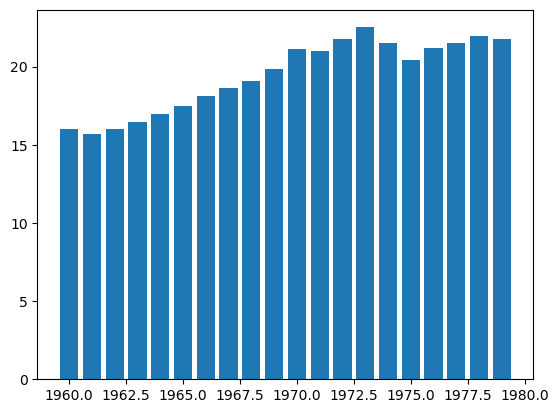

In [25]:
# get the years for country USA
years = stage['Year'].values

# get the values
co2 = stage['Value'].values

# create
plt.bar(years,co2)
plt.show

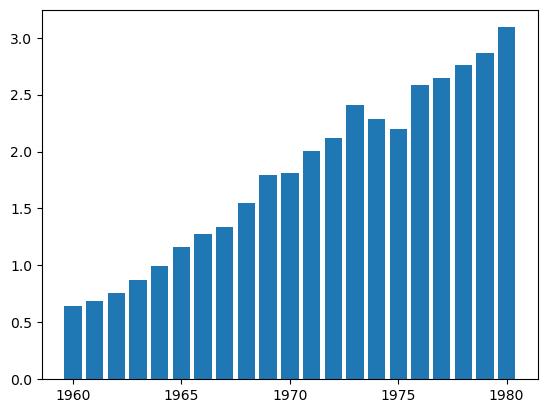

In [26]:
# get the years For the country ARB
years = stage1['Year'].values
# get the values 
co2 = stage1['Value'].values

# create
plt.bar(years,co2)
plt.show()

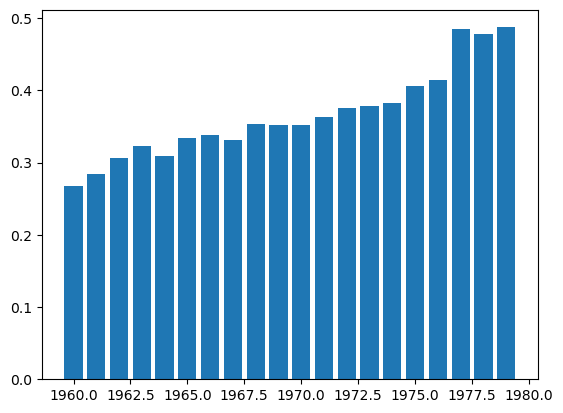

In [27]:
# get the years for the country IND
years = stage2['Year'].values
# get the values 
co2 = stage2['Value'].values

# create
plt.bar(years,co2)
plt.show()

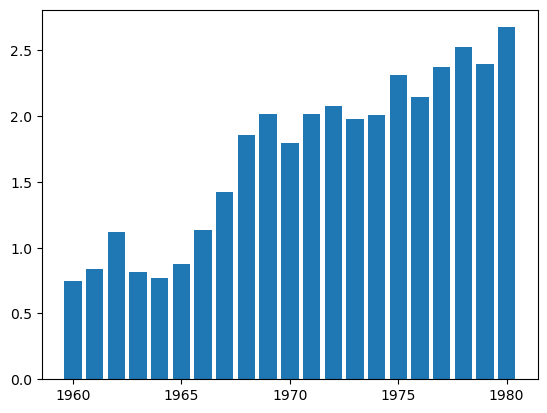

In [28]:
# get the years for the country BRB
years = stage3['Year'].values
# get the values 
co2 = stage3['Value'].values

# create
plt.bar(years,co2)
plt.show()

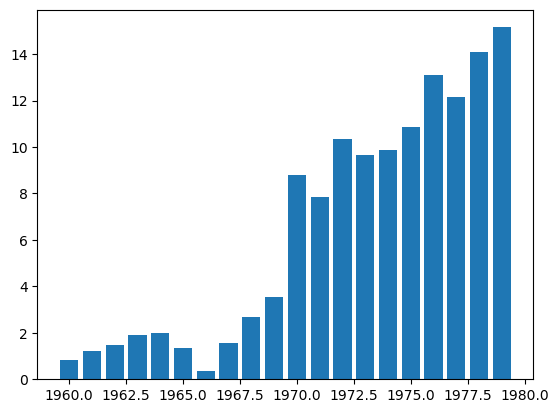

In [29]:
# get the years for the country SGP
years = stage4['Year'].values
# get the values 
co2 = stage4['Value'].values

# create
plt.bar(years,co2)
plt.show()

## Plot the figure 'CO2 Emissions in USA'  (Year vs Indicator Name).

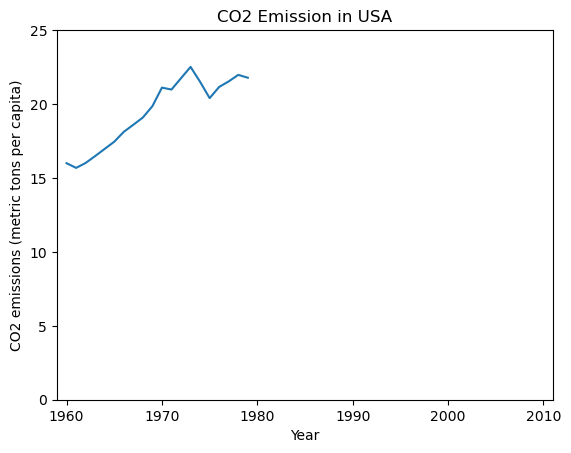

In [30]:
# switch to a line plot 
plt.plot(stage['Year'].values, stage['Value'].values)

# label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

# label the figure
plt.title('CO2 Emission in USA')

# to make more honest, start they y axis at 0
plt.axis([1959,2011,0,25])
# plt.plot(stage['Year'].values,stage['Value'].values)

plt.show()

# Plot the figure 'CO2 Emissions in IND' (Year vs Indicator Name).

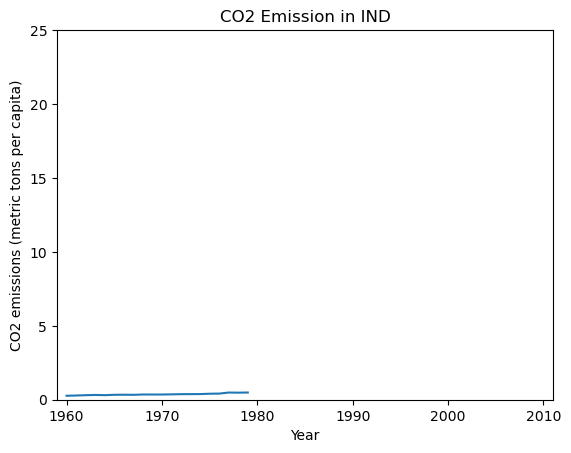

In [31]:
# switch to a line plot 
plt.plot(stage2['Year'].values, stage2['Value'].values)

# label the axes
plt.xlabel('Year')
plt.ylabel(stage2['IndicatorName'].iloc[0])

# label the figure
plt.title('CO2 Emission in IND')

# to make more honest, start they y axis at 0
plt.axis([1959,2011,0,25])
# plt.plot(stage['Year'].values,stage['Value'].values)

plt.show()

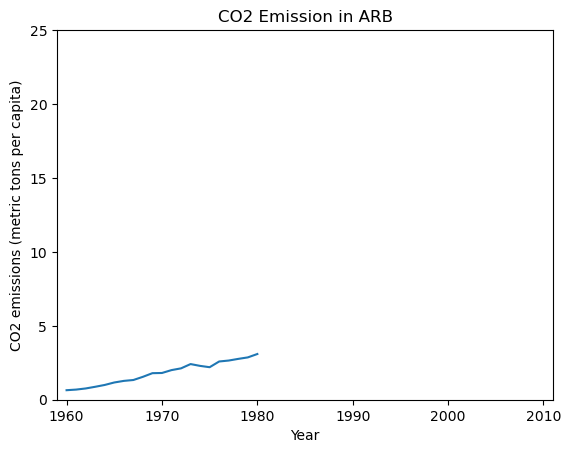

In [32]:
# switch to a line plot 
plt.plot(stage1['Year'].values, stage1['Value'].values)

# label the axes
plt.xlabel('Year')
plt.ylabel(stage1['IndicatorName'].iloc[0])

# label the figure
plt.title('CO2 Emission in ARB')

# to make more honest, start they y axis at 0
plt.axis([1959,2011,0,25])
# plt.plot(stage['Year'].values,stage['Value'].values)

plt.show()

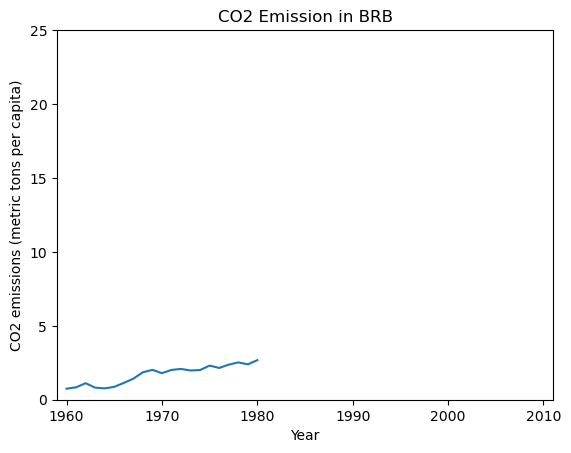

In [33]:
# switch to a line plot 
plt.plot(stage3['Year'].values, stage3['Value'].values)

# label the axes
plt.xlabel('Year')
plt.ylabel(stage3['IndicatorName'].iloc[0])

# label the figure
plt.title('CO2 Emission in BRB')

# to make more honest, start they y axis at 0
plt.axis([1959,2011,0,25])
# plt.plot(stage['Year'].values,stage['Value'].values)

plt.show()

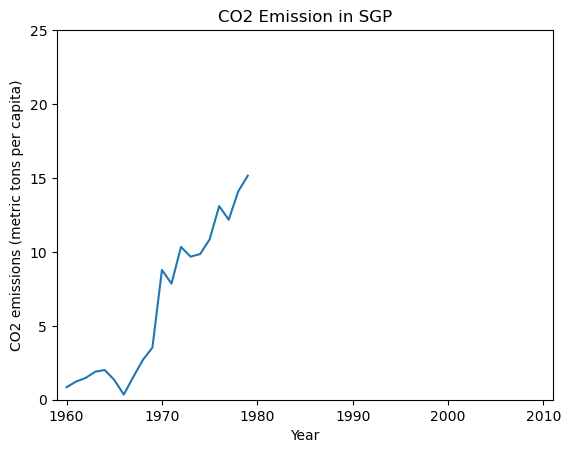

In [34]:
# switch to a line plot 
plt.plot(stage4['Year'].values, stage4['Value'].values)

# label the axes
plt.xlabel('Year')
plt.ylabel(stage4['IndicatorName'].iloc[0])

# label the figure
plt.title('CO2 Emission in SGP')

# to make more honest, start they y axis at 0
plt.axis([1959,2011,0,25])
# plt.plot(stage['Year'].values,stage['Value'].values)

plt.show()

## Histogram Representation

In [35]:
hist_data = stage['Value'].values

In [36]:
print(len(hist_data))

20


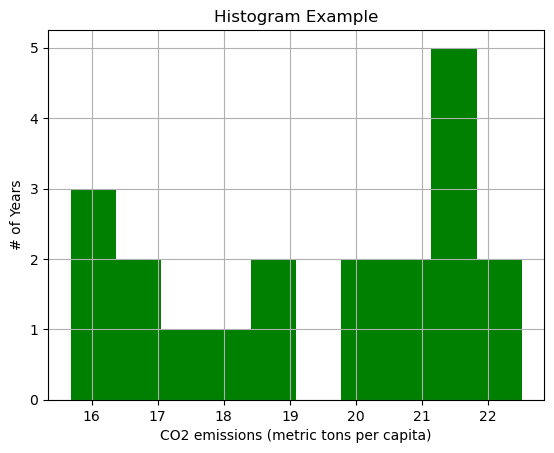

In [37]:
# the histogram of the data
plt.hist(hist_data, 10, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

For how many countries do we have CO2 per capita emissions data in 2011



# Spliting data into Train and test

In [40]:
x=data.drop(['Value','IndicatorCode'],axis=1)
x=pd.DataFrame(x)
y=data['Value']
y=pd.DataFrame(y)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(838860, 4)
(209715, 4)
(838860, 1)
(209715, 1)


# BUILDING THE MODEL

In [42]:
from sklearn.ensemble import RandomForestRegressor
rand=RandomForestRegressor(n_estimators=10,random_state=52,n_jobs=-1)
rand.fit(x_train,y_train)

C:\Users\shannu\AppData\Local\Temp\ipykernel_12072\1631250468.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=52)

# PREDICTING THE RESULTS

In [43]:
y_pred=rand.predict(x_test)
print(y_pred)

[ 1.99958200e+11 -9.50760000e+06  1.47099313e+04 ...  4.48811626e+01
  1.06875837e+11  4.44670264e+01]


# Model Evaluation

checking the score of our model

In [44]:
rand.score(x_train,y_train)

0.9940121787638959

# Saving the model

Dumping our model

In [45]:
import pickle
pickle.dump(rand,open("CO2.pickle","wb"))